# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (44.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and dir

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [3]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [4]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os

In [5]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

seed = 42
my_seed_everywhere(seed)

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

In [ ]:
# !sudo apt-get install -y fonts-nanum

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
# !sudo apt-get install -y fonts-nanum

In [ ]:
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
# print(font_name)
# plt.rcParams['font.family']=font_name
# assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

### 1-4. 구글드라이브 연결(Colab)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [7]:
import scipy
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/'
bigram_x_train = scipy.sparse.load_npz(data_path + 'bigram_x_train.npz').toarray()
bigram_x_val = scipy.sparse.load_npz(data_path + 'bigram_x_val.npz').toarray()
y_train = pd.read_csv(data_path + 'y_train.csv')['label']
y_val = pd.read_csv(data_path + 'y_val.csv')['label']
bigram_x_train.shape, bigram_x_val.shape, y_train.shape, y_val.shape

((2964, 55837), (742, 55837), (2964,), (742,))

In [8]:
seq_x_train = np.load(data_path + 'seq_x_train.npy')
seq_x_val = np.load(data_path + 'seq_x_val.npy')
seq_x_train.shape, seq_x_val.shape

((2964, 400), (742, 400))

In [9]:
w2v_x_train = np.load(data_path +'w2v_x_train.npy')
w2v_x_val = np.load(data_path +'w2v_x_val.npy')
w2v_x_train.shape, w2v_x_val.shape

((2964, 100), (742, 100))

## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

### 3-1. Model 1

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
%%time
model = LGBMClassifier(random_state=2023)
model.fit(bigram_x_train, y_train)

CPU times: user 2.07 s, sys: 321 ms, total: 2.39 s
Wall time: 1.62 s


LGBMClassifier(random_state=2023)

In [ ]:
y_pred = model.predict(bigram_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       317
           1       0.40      0.22      0.29       147
           2       0.51      0.37      0.43       146
           3       0.51      0.42      0.46       112
           4       0.67      0.60      0.63        20

    accuracy                           0.52       742
   macro avg       0.53      0.48      0.49       742
weighted avg       0.51      0.52      0.50       742



In [ ]:
# word2vec
%%time
model = LGBMClassifier(random_state=2023)
model.fit(w2v_x_train, y_train)

y_pred = model.predict(w2v_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       317
           1       0.38      0.22      0.28       147
           2       0.39      0.41      0.40       146
           3       0.56      0.62      0.59       112
           4       0.25      0.05      0.08        20

    accuracy                           0.54       742
   macro avg       0.44      0.41      0.41       742
weighted avg       0.52      0.54      0.52       742

CPU times: user 8.58 s, sys: 67.1 ms, total: 8.65 s
Wall time: 4.81 s


### 3-2. Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
model = RandomForestClassifier(random_state=2023)
model.fit(bigram_x_train, y_train)

CPU times: user 1min 23s, sys: 221 ms, total: 1min 23s
Wall time: 1min 23s


RandomForestClassifier(random_state=2023)

In [ ]:
y_pred = model.predict(bigram_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71       317
           1       0.96      0.31      0.46       147
           2       0.84      0.25      0.38       146
           3       0.87      0.54      0.66       112
           4       0.83      0.75      0.79        20

    accuracy                           0.63       742
   macro avg       0.81      0.56      0.60       742
weighted avg       0.74      0.63      0.59       742



In [ ]:
# word2vec
%%time
model = RandomForestClassifier(random_state=2023)
model.fit(w2v_x_train, y_train)

y_pred = model.predict(w2v_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       317
           1       0.39      0.22      0.28       147
           2       0.43      0.40      0.42       146
           3       0.54      0.66      0.60       112
           4       0.14      0.05      0.07        20

    accuracy                           0.55       742
   macro avg       0.43      0.42      0.41       742
weighted avg       0.52      0.55      0.52       742

CPU times: user 2.33 s, sys: 5.7 ms, total: 2.34 s
Wall time: 2.33 s


### 3-3. Model 3

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
%%time
moel = CatBoostClassifier()
model.fit(bigram_x_train, y_train)
preds_class = model.predict(bigram_x_val)
preds_proba = model.predict_proba(bigram_x_val)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 2 3 2 0 0 0 3 0 2 0 1 3 0 0 0 3 3 0 0
 0 2 0 0 0 3 0 0 0 0 0 0 0 0 4 0 0 2 0 3 1 0 0 0 0 0 0 0 0 0 1 3 0 2 0 0 0
 0 3 0 3 2 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 2 0 0 0 4 3 0 0 0 4 0 0 0 0 0 0
 0 0 1 1 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 3 0 1 3 1
 0 3 4 0 3 0 0 0 0 3 2 0 0 0 0 0 2 1 0 2 0 0 0 2 2 0 0 0 3 2 0 0 0 3 0 0 0
 3 0 0 4 0 2 3 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 1 0 1 0 0 0 0 0 0 3 3 0 2 0 0
 0 0 0 0 0 4 0 0 2 0 0 0 3 0 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 4 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 3 3 0 0 3 0 0 3 1 0 0 0 0 1 0
 0 3 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0
 0 2 0 0 0 0 2 3 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 3 0 0 0 3 0 0 1 0 0 0 0 0 0
 0 1 0 3 0 0 0 1 0 1 0 0 0 3 1 0 0 0 0 2 0 3 0 0 0 1 0 3 0 0 0 0 0 0 0 3 0
 0 0 4 3 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 3 0 0 0 3 4 0 0 3 0 0 0 0 0 0 1 0 0
 2 0 3 0 1 3 0 0

In [ ]:
print(classification_report(y_val, preds_class))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71       317
           1       0.96      0.31      0.46       147
           2       0.84      0.25      0.38       146
           3       0.87      0.54      0.66       112
           4       0.83      0.75      0.79        20

    accuracy                           0.63       742
   macro avg       0.81      0.56      0.60       742
weighted avg       0.74      0.63      0.59       742



In [ ]:
%%time
moel = CatBoostClassifier()
model.fit(w2v_x_train, y_train)
preds_class = model.predict(w2v_x_val)
print(classification_report(y_val, preds_class))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       317
           1       0.39      0.22      0.28       147
           2       0.43      0.40      0.42       146
           3       0.54      0.66      0.60       112
           4       0.14      0.05      0.07        20

    accuracy                           0.55       742
   macro avg       0.43      0.42      0.41       742
weighted avg       0.52      0.55      0.52       742

CPU times: user 2.35 s, sys: 9.8 ms, total: 2.36 s
Wall time: 2.36 s


### 3-4. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [10]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### 4-1. DNN

In [27]:
# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400, ))

hl = Dense(64, activation='swish')(il)
hl = Dense(128, activation='swish')(hl)
hl = Dense(256, activation='swish')(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 dense (Dense)               (None, 64)                25664     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 68,293
Trainable params: 68,293
Non-trainable params: 0
_________________________________________________________________


In [28]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 2s 6ms/step - loss: 42.9853 - accuracy: 0.3087 - val_loss: 19.4618 - val_accuracy: 0.3194
Epoch 2/1000
93/93 [==============================] - 0s 4ms/step - loss: 11.4603 - accuracy: 0.4076 - val_loss: 14.5005 - val_accuracy: 0.3019
Epoch 3/1000
93/93 [==============================] - 1s 7ms/step - loss: 6.3549 - accuracy: 0.5034 - val_loss: 12.7832 - val_accuracy: 0.3302
Epoch 4/1000
93/93 [==============================] - 1s 7ms/step - loss: 3.8559 - accuracy: 0.5641 - val_loss: 12.1468 - val_accuracy: 0.3396
Epoch 5/1000
93/93 [==============================] - 1s 6ms/step - loss: 2.6156 - accuracy: 0.6333 - val_loss: 11.2531 - val_accuracy: 0.2938
Epoch 6/1000
93/93 [==============================] - 1s 6ms/step - loss: 1.5660 - accuracy: 0.7051 - val_loss: 10.6220 - val_accuracy: 0.3248
Epoch 7/1000
93/93 [==============================] - 1s 6ms/step - loss: 1.0768 - accuracy: 0.7483 - val_loss: 10.4481 - val_accuracy: 0.31

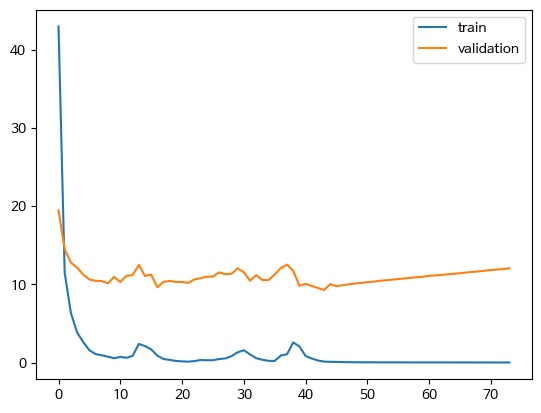

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [30]:
# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(100, ))

hl = Dense(64, activation='swish')(il)
hl = Dense(128, activation='swish')(hl)
hl = Dense(256, activation='swish')(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,093
Trainable params: 49,093
Non-trainable params: 0
_________________________________________________________________


In [31]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(w2v_x_train, y_train, validation_data=(w2v_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 2s 6ms/step - loss: 1.2285 - accuracy: 0.4872 - val_loss: 1.1818 - val_accuracy: 0.4973
Epoch 2/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1827 - accuracy: 0.5024 - val_loss: 1.1691 - val_accuracy: 0.4973
Epoch 3/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1632 - accuracy: 0.5135 - val_loss: 1.1698 - val_accuracy: 0.4852
Epoch 4/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1555 - accuracy: 0.5219 - val_loss: 1.1373 - val_accuracy: 0.5364
Epoch 5/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1481 - accuracy: 0.5297 - val_loss: 1.1492 - val_accuracy: 0.5216
Epoch 6/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1423 - accuracy: 0.5337 - val_loss: 1.1480 - val_accuracy: 0.5472
Epoch 7/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1408 - accuracy: 0.5358 - val_loss: 1.1309 - val_accuracy: 0.5377
Epoch 

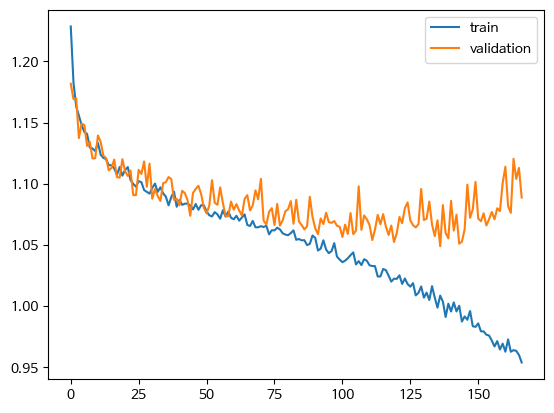

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### 4-2. 1-D CNN

In [33]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)
hl = Flatten()(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 400, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 400, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 128)          41088     
                                                             

In [34]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 18s 157ms/step - loss: 1.3826 - accuracy: 0.4308 - val_loss: 1.1164 - val_accuracy: 0.5121
Epoch 2/1000
93/93 [==============================] - 10s 108ms/step - loss: 0.9676 - accuracy: 0.5924 - val_loss: 0.9519 - val_accuracy: 0.5701
Epoch 3/1000
93/93 [==============================] - 8s 82ms/step - loss: 0.7130 - accuracy: 0.6987 - val_loss: 0.8882 - val_accuracy: 0.6442
Epoch 4/1000
93/93 [==============================] - 7s 75ms/step - loss: 0.5284 - accuracy: 0.8003 - val_loss: 1.1442 - val_accuracy: 0.6375
Epoch 5/1000
93/93 [==============================] - 7s 73ms/step - loss: 0.4255 - accuracy: 0.8313 - val_loss: 1.6458 - val_accuracy: 0.6402
Epoch 6/1000
93/93 [==============================] - 5s 49ms/step - loss: 0.3204 - accuracy: 0.8799 - val_loss: 1.7315 - val_accuracy: 0.6469
Epoch 7/1000
93/93 [==============================] - 5s 54ms/step - loss: 0.2433 - accuracy: 0.9163 - val_loss: 2.1366 - val_accuracy: 0.

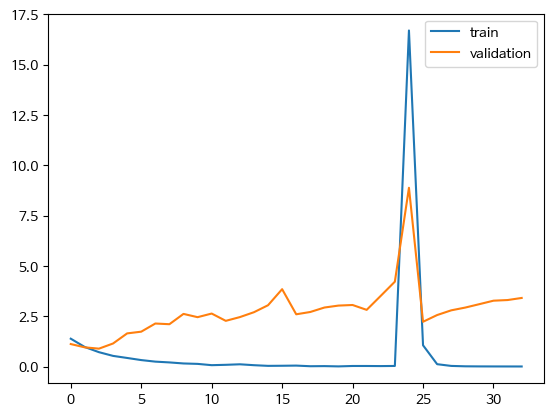

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [36]:
max_words = 2993
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(100,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)
hl = Flatten()(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          383104    
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 128)           41088     
                                                             

In [37]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(w2v_x_train, y_train, validation_data=(w2v_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 5s 14ms/step - loss: 1.4210 - accuracy: 0.4207 - val_loss: 1.3878 - val_accuracy: 0.4272
Epoch 2/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3913 - accuracy: 0.4278 - val_loss: 1.3583 - val_accuracy: 0.4272
Epoch 3/1000
93/93 [==============================] - 1s 7ms/step - loss: 1.3383 - accuracy: 0.4295 - val_loss: 1.3374 - val_accuracy: 0.4259
Epoch 4/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3308 - accuracy: 0.4312 - val_loss: 1.3324 - val_accuracy: 0.4259
Epoch 5/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3390 - accuracy: 0.4305 - val_loss: 1.3534 - val_accuracy: 0.4286
Epoch 6/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3319 - accuracy: 0.4291 - val_loss: 1.3330 - val_accuracy: 0.4259
Epoch 7/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3284 - accuracy: 0.4312 - val_loss: 1.3332 - val_accuracy: 0.4259
Epoch

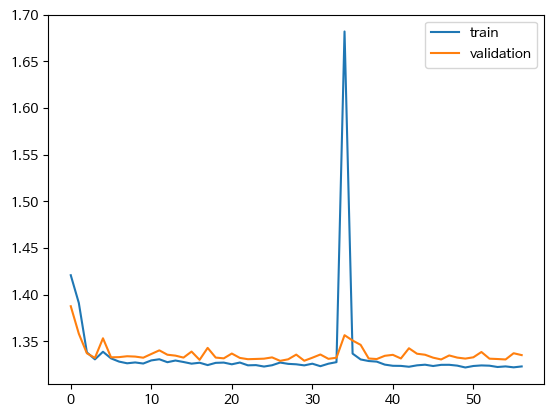

In [38]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### 4-3. LSTM

In [43]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=False)(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 400, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 400, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 128)          41088     
                                                             

In [44]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 23s 176ms/step - loss: 1.2531 - accuracy: 0.4659 - val_loss: 1.0270 - val_accuracy: 0.5620
Epoch 2/1000
93/93 [==============================] - 11s 118ms/step - loss: 0.9038 - accuracy: 0.6272 - val_loss: 0.9480 - val_accuracy: 0.6132
Epoch 3/1000
93/93 [==============================] - 8s 89ms/step - loss: 0.6988 - accuracy: 0.7244 - val_loss: 0.9408 - val_accuracy: 0.6280
Epoch 4/1000
93/93 [==============================] - 8s 87ms/step - loss: 0.5454 - accuracy: 0.7932 - val_loss: 0.9642 - val_accuracy: 0.6469
Epoch 5/1000
93/93 [==============================] - 7s 71ms/step - loss: 0.4260 - accuracy: 0.8404 - val_loss: 0.9674 - val_accuracy: 0.6563
Epoch 6/1000
93/93 [==============================] - 6s 63ms/step - loss: 0.3223 - accuracy: 0.8860 - val_loss: 1.0170 - val_accuracy: 0.7008
Epoch 7/1000
93/93 [==============================] - 4s 48ms/step - loss: 0.2388 - accuracy: 0.9271 - val_loss: 1.0536 - val_accuracy: 0.

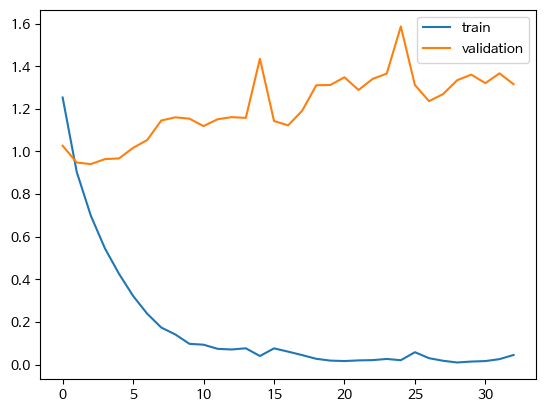

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [48]:
max_words = 2993
embedding_dim = 128


# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(100,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=False)(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          383104    
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 50, 64)            33024     
                                                             

In [49]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(w2v_x_train, y_train, validation_data=(w2v_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 8s 27ms/step - loss: 1.4126 - accuracy: 0.4170 - val_loss: 1.3873 - val_accuracy: 0.4272
Epoch 2/1000
93/93 [==============================] - 2s 17ms/step - loss: 1.3921 - accuracy: 0.4278 - val_loss: 1.3877 - val_accuracy: 0.4272
Epoch 3/1000
93/93 [==============================] - 2s 20ms/step - loss: 1.3899 - accuracy: 0.4278 - val_loss: 1.3949 - val_accuracy: 0.4272
Epoch 4/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3914 - accuracy: 0.4278 - val_loss: 1.3908 - val_accuracy: 0.4272
Epoch 5/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3936 - accuracy: 0.4278 - val_loss: 1.3892 - val_accuracy: 0.4272
Epoch 6/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3886 - accuracy: 0.4278 - val_loss: 1.3911 - val_accuracy: 0.4272
Epoch 7/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3913 - accuracy: 0.4278 - val_loss: 1.3883 - val_accuracy: 0.4272

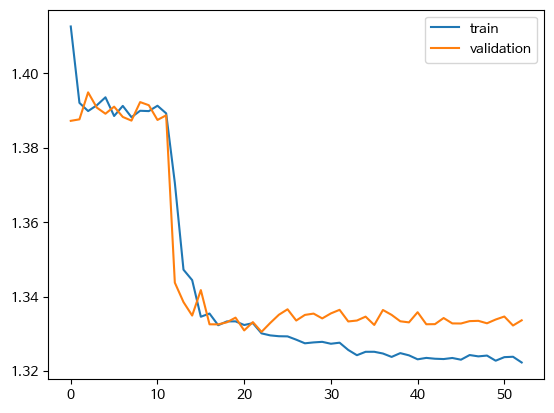

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)